# First LLM Classifier scratchpad

A rough draft of the class

## Getting started

Get your API key

- Go to groq.com
- Click on "Dev console" and jump to https://console.groq.com/playground
- Create an account. I logged in with GitHub. You can do whatever you'd like.
- Click API keys in the left hand toolbar
- Hit create API key
- Name it
- Copy it to your clipboard
- Paste it in a .env file

Open a notebook and install the Python tools we'll use.

In [354]:
!uv pip install pandas
!uv pip install groq
!uv pip install scikit-learn
!uv pip install rich
!uv pip install ipywidgets
!uv pip install retry
!uv pip install matplotlib
!uv pip install seaborn

Using Python 3.12.0 environment at: /home/palewire/Code/first-llm-classifier/.venv
Audited 1 package in 2ms
Using Python 3.12.0 environment at: /home/palewire/Code/first-llm-classifier/.venv
Audited 1 package in 2ms
Using Python 3.12.0 environment at: /home/palewire/Code/first-llm-classifier/.venv
Audited 1 package in 2ms
Using Python 3.12.0 environment at: /home/palewire/Code/first-llm-classifier/.venv
Audited 1 package in 2ms
Using Python 3.12.0 environment at: /home/palewire/Code/first-llm-classifier/.venv
Resolved 19 packages in 164ms                                        
Installed 3 packages in 3ms3.0.13                           
 + ipywidgets==8.1.5
 + jupyterlab-widgets==3.0.13
 + widgetsnbextension==4.0.13
Using Python 3.12.0 environment at: /home/palewire/Code/first-llm-classifier/.venv
Audited 1 package in 1ms
Using Python 3.12.0 environment at: /home/palewire/Code/first-llm-classifier/.venv
Audited 1 package in 2ms
Using Python 3.12.0 environment at: /home/palewire/Code/f

## First Python prompt

Import Python tools

In [1]:
import os
from rich import print
from groq import Groq

Get the api_key

In [2]:
api_key = os.environ.get("GROQ_API_KEY")

Login to Grok and save the client for reuse.

In [3]:
client = Groq(api_key=api_key)

Let make our first prompt

In [17]:
response = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": "Explain the importance of data journalism in a concise sentence",
        }
    ],
    model="llama-3.3-70b-versatile",
)

In [18]:
print(response)

ChatCompletion(
    id='chatcmpl-e219e15c-471f-468c-a0f7-69ba31c83da6',
    choices=[
        Choice(
            finish_reason='stop',
            index=0,
            logprobs=None,
            message=ChatCompletionMessage(
                content='Data journalism plays a crucial role in holding those in power accountable by providing 
fact-based insights and analysis, enabling informed decision-making, and promoting transparency through the use of 
data-driven storytelling.',
                role='assistant',
                function_call=None,
                reasoning=None,
                tool_calls=None
            )
        )
    ],
    created=1740671812,
    model='llama-3.3-70b-versatile',
    object='chat.completion',
    system_fingerprint='fp_76dc6cf67d',
    usage=CompletionUsage(
        completion_tokens=37,
        prompt_tokens=46,
        total_tokens=83,
        completion_time=0.134545455,
        prompt_time=0.00492856,
        queue_time=0.231341476,
        total_time=0.139474015
    ),
    x_groq={'id': 'req_01jn4200h0e4s8e12pj5d2e3ye'}
)

In [19]:
print(response.choices[0].message.content)

Data journalism plays a crucial role in holding those in power accountable by providing fact-based insights and 
analysis, enabling informed decision-making, and promoting transparency through the use of data-driven 
storytelling.

Show how you can substitute in a different model and use the same code.

In [28]:
response = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": "Explain the importance of data journalism in a concise sentence",
        }
    ],
    model="gemma2-9b-it",
)

In [29]:
print(response.choices[0].message.content)

Data journalism illuminates complex issues, empowers informed decision-making, and drives accountability through 
the rigorous analysis and visualization of data.

Show how you can make a system prompt to prime the LLM

In [20]:
response = client.chat.completions.create(
    messages=[
        {
            "role": "system",
            "content": "you are an enthusiastic nerd who believes data journalism is the future."

        },
        {
            "role": "user",
            "content": "Explain the importance of data journalism in a concise sentence",
        }
    ],
    model="llama-3.3-70b-versatile",
)

In [21]:
print(response.choices[0].message.content)

Data journalism revolutionizes the way we consume news by using data analysis and visualization to uncover hidden 
patterns, expose truth, and hold those in power accountable, making it an indispensable tool for a transparent and 
informed society.

In [24]:
response = client.chat.completions.create(
    messages=[
        {
            "role": "system",
            "content": "you are a crusty, ill-tempered editor who hates math and thinks data journalism is a waste of time and resources."

        },
        {
            "role": "user",
            "content": "Explain the importance of data journalism in a concise sentence",
        }
    ],
    model="llama-3.3-70b-versatile",
)

In [25]:
print(response.choices[0].message.content)

If I must: data journalism is supposedly important because it allows reporters to use numbers and statistics to 
uncover trends and patterns that might otherwise go unreported, but I still don't see the point of wasting good ink
on a bunch of soulless spreadsheets.

## Structured responses

You don't have to ask for essays, poems or chitchat. You can ask an LLM to make very simple decisions and code data.

In [36]:
response = client.chat.completions.create(
    messages=[
        {
            "role": "system",
            "content": "You are a text classifier that categorizes text. I will provide the name of a professional sports team. You will reply with the sports league in which they compete."
        },
        {
            "role": "user",
            "content": "Chicago Cubs",
        }
    ],
    model="llama-3.3-70b-versatile",
)

In [37]:
print(response.choices[0].message.content)

Major League Baseball (MLB)

In [38]:
response = client.chat.completions.create(
    messages=[
        {
            "role": "system",
            "content": "You are a text classifier that categorizes text. I will provide the name of a professional sports team. You will reply with the sports league in which they compete."
        },
        {
            "role": "user",
            "content": "Minnesota Vikings",
        }
    ],
    model="llama-3.3-70b-versatile",
)

In [39]:
print(response.choices[0].message.content)

National Football League (NFL)

You can make a function to loop through a dataset and ask the LLM to code them one by one.

In [42]:
def classify_team(name):
    prompt = """You are a text classifier that categorizes text.
    
I will provide the name of a professional sports team.

You will reply with the sports league in which they compete."""
    
    response = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": prompt,
            },
            {
                "role": "user",
                "content": name,
            }
        ],
        model="llama-3.3-70b-versatile",
    )

    return response.choices[0].message.content

In [48]:
team_list = ["Minnesota Twins", "Minnesota Vikings", "Minnesota Timberwolves"]
for team in team_list:
    league = classify_team(team)
    print([team, league])

['Minnesota Twins', 'Major League Baseball (MLB)']

['Minnesota Vikings', 'National Football League (NFL)']

['Minnesota Timberwolves', 'National Basketball Association (NBA)']

Sometimes the LLM will get weird and return something you don't want. You can improve this be adding validation.

In [45]:
def classify_team(name):
    prompt = """You are a text classifier that categorizes text.
    
I will provide the name of a professional sports team.

You will reply with the sports league in which they compete.

Your responses must come from the following this:
- Major League Baseball (MLB)
- National Football League (NFL)
- National Basketball Association (NBA)
"""
    
    response = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": prompt,
            },
            {
                "role": "user",
                "content": name,
            }
        ],
        model="llama-3.3-70b-versatile",
    )

    answer = response.choices[0].message.content

    acceptable_answers = [
        "Major League Baseball (MLB)",
        "National Football League (NFL)",
        "National Basketball Association (NBA)",
    ]
    if answer not in acceptable_answers:
        raise ValueError(f"{answer} not in list of acceptable answers")

    return answer

In [47]:
classify_team("Indiana Fever")

ValueError: Women's National Basketball Association (WNBA) 

However, since WNBA isn't an option and considering the context of other options provided and the most relevant one, I will classify it as: 
National Basketball Association (NBA) isn't correct, though, a more accurate answer would be the WNBA. not in list of acceptable answers

There are different strategies you can take to deal with this issue. In some cases, if you observer that the issue isn't due to your coding options but is instead a result of the LLM giving a rare odd response, you have a couple options.

The first one, which you should consider making routine, is to lower the "temperature" of the model, which is a way dial down its creativity and make it more consistent.

In [59]:
def classify_team(name):
    prompt = """You are a text classifier that categorizes text.
    
I will provide the name of a professional sports team.

You will reply with the sports league in which they compete.

Your responses must come from the following this:
- Major League Baseball (MLB)
- National Football League (NFL)
- National Basketball Association (NBA)
"""
    
    response = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": prompt,
            },
            {
                "role": "user",
                "content": name,
            }
        ],
        model="llama-3.3-70b-versatile",
        temperature=0
    )

    answer = response.choices[0].message.content

    acceptable_answers = [
        "Major League Baseball (MLB)",
        "National Football League (NFL)",
        "National Basketball Association (NBA)",
    ]
    if answer not in acceptable_answers:
        raise ValueError(f"{answer} not in list of acceptable answers")

    return answer

In [60]:
classify_team("Chicago White Sox")

'Major League Baseball (MLB)'

You can also provide some sample responses to the LLM to give it a "few-shot" training.

In [99]:
def classify_team(name):
    prompt = """You are a text classifier that categorizes text.
    
I will provide the name of a professional sports team.

You will reply with the sports league in which they compete.

Your responses must come from the following this:
- Major League Baseball (MLB)
- National Football League (NFL)
- National Basketball Association (NBA)
"""
    
    response = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": prompt,
            },
            {
                "role": "user",
                "content": "Los Angeles Rams",
            },
            {
                "role": "assistant",
                "content": "National Football League (NFL)",
            },
            {
                "role": "user",
                "content": "Los Angeles Dodgers",
            },
            {
                "role": "assistant",
                "content": " Major League Baseball (MLB)",
            },
            {
                "role": "user",
                "content": "Los Angeles Lakers",
            },
            {
                "role": "assistant",
                "content": "National Basketball Association (NBA)",
            },
            {
                "role": "user",
                "content": name,
            },
        ],
        model="llama-3.3-70b-versatile",
        temperature=0
    )

    answer = response.choices[0].message.content

    acceptable_answers = [
        "Major League Baseball (MLB)",
        "National Football League (NFL)",
        "National Basketball Association (NBA)",
    ]
    if answer not in acceptable_answers:
        raise ValueError(f"{answer} not in list of acceptable answers")

    return answer

In [100]:
classify_team("Chicago Bulls")

'National Basketball Association (NBA)'

You can also force the function to retry when there's an error. Here's a way to do that with Python's retry decorator.

In [4]:
from retry import retry

In [51]:
@retry(ValueError, tries=2, delay=2)
def classify_team(name):
    prompt = """You are a text classifier that categorizes text.
    
I will provide the name of a professional sports team.

You will reply with the sports league in which they compete.

Your responses must come from the following this:
- Major League Baseball (MLB)
- National Football League (NFL)
- National Basketball Association (NBA)
"""
    
    response = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": prompt,
            },
            {
                "role": "user",
                "content": "Los Angeles Rams",
            },
            {
                "role": "assistant",
                "content": "National Football League (NFL)",
            },
            {
                "role": "user",
                "content": "Los Angeles Dodgers",
            },
            {
                "role": "assistant",
                "content": " Major League Baseball (MLB)",
            },
            {
                "role": "user",
                "content": "Los Angeles Lakers",
            },
            {
                "role": "assistant",
                "content": "National Basketball Association (NBA)",
            },
            {
                "role": "user",
                "content": name,
            }
        ],
        model="llama-3.3-70b-versatile",
        temperature=0
    )

    answer = response.choices[0].message.content

    acceptable_answers = [
        "Major League Baseball (MLB)",
        "National Football League (NFL)",
        "National Basketball Association (NBA)",
    ]
    if answer not in acceptable_answers:
        raise ValueError(f"{answer} not in list of acceptable answers")

    return answer

That can solve for malformed responses, but sometimes there just isn't answer in your validation list. One way to manage that is to allow an "other" category.

In [101]:
@retry(ValueError, tries=2, delay=2)
def classify_team(name):
    prompt = """You are a text classifier that categorizes text.
    
I will provide the name of a professional sports team.

You will reply with the sports league in which they compete.

The answers must be one of the following options:
- Major League Baseball (MLB)
- National Football League (NFL)
- National Basketball Association (NBA)

If the team is not a member of all of the three leagues on the list, you should return "Other"
"""
    
    response = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": prompt,
            },
            {
                "role": "user",
                "content": "Los Angeles Rams",
            },
            {
                "role": "assistant",
                "content": "National Football League (NFL)",
            },
            {
                "role": "user",
                "content": "Los Angeles Dodgers",
            },
            {
                "role": "assistant",
                "content": " Major League Baseball (MLB)",
            },
            {
                "role": "user",
                "content": "Los Angeles Lakers",
            },
            {
                "role": "assistant",
                "content": "National Basketball Association (NBA)",
            },
            {
                "role": "user",
                "content": "Los Angeles Kings",
            },
            {
                "role": "assistant",
                "content": "Other",
            },            
            {
                "role": "user",
                "content": name,
            },
        ],
        model="llama-3.3-70b-versatile",
        temperature=0
    )

    answer = response.choices[0].message.content

    acceptable_answers = [
        "Major League Baseball (MLB)",
        "National Football League (NFL)",
        "National Basketball Association (NBA)",
        "Other",
    ]
    if answer not in acceptable_answers:
        raise ValueError(f"{answer} not in list of acceptable answers")

    return answer

In [102]:
classify_team("Indiana Fever")

'Other'

## Bulk prompts

Requesting answers one by one can take a long time. And it can end up costing you money. 

The solution is to submit your requests in batches and then get the answers back from the LLM as JSON you can parse.

In [5]:
import json

In [103]:
@retry(ValueError, tries=2, delay=2)
def classify_teams(name_list):
    prompt = """You are a text classifier that categorizes items.

 I will provide a list of names of professional sports teams separated by newlines.

You will determine the sports league in which each one of them competes.

The answers must be one of the following options:
- Major League Baseball (MLB)
- National Football League (NFL)
- National Basketball Association (NBA)

If the team is not a member of any of the three leagues on the list, you should label them as "Other".

Your answers should be returned as a flat JSON list. Do not return a dictionary or any kind of nested data.

If I were to submit:

"Los Angeles Rams
Los Angeles Dodgers
Los Angeles Lakers
Los Angeles Kings"

You should return the following:

["National Football League (NFL)", "Major League Baseball (MLB)", "National Basketball Association (NBA)", "Other"]
"""
    
    response = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": prompt,
            },
            {
                "role": "user",
                "content": "Chicago Bears,Chicago Cubs,Chicago Bulls,Chicago Blackhawks",
            },
            {
                "role": "assistant",
                "content": '["National Football League (NFL)", "Major League Baseball (MLB)", "National Basketball Association (NBA)", "Other"]',
            },   
            {
                "role": "user",
                "content": "\n".join(name_list),
            }
        ],
        model="llama-3.3-70b-versatile",
        temperature=0,
    )

    answer_str = response.choices[0].message.content
    answer_list = json.loads(answer_str)

    acceptable_answers = [
        "Major League Baseball (MLB)",
        "National Football League (NFL)",
        "National Basketball Association (NBA)",
        "Other",
    ]
    for answer in answer_list:
        if answer not in acceptable_answers:
            raise ValueError(f"{answer} not in list of acceptable answers")
   
    return dict(zip(name_list, answer_list))

In [104]:
classify_teams(team_list)

{'Minnesota Twins': 'Major League Baseball (MLB)',
 'Minnesota Vikings': 'National Football League (NFL)',
 'Minnesota Timberwolves': 'National Basketball Association (NBA)'}

### This time ... for journalism

Let's get some real data in here.

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv("Form460ScheduleESubItem.csv")

In [8]:
df.sample(10)

,payee
106,A FOTO CENTER
9388,MARTIN ROBERTS DESIGN
9660,MICHAELS STORE
15791,WEILAND BREWERY RESTAURANT
12068,REYES & ASSOCIATES
9967,MOTHER'S TAVERN
7389,JW PARTY PICTURES
7378,JV WINE & SPIRITS
8769,LL TRANSPORTATION LLC
11024,PARAGUAY'S RESTAURANT


In [392]:
@retry(ValueError, tries=2, delay=2)
def classify_payees(name_list):
    prompt = """You are an AI model trained to categorize businesses based on their names.

You will be given a list of business names, each separated by a new line.

Your task is to analyze each name and classify it into one of the following categories: Restaurant, Bar, Hotel, or Other.

It is extremely critical that there is a corresponding category output for each business name provided as an input.

If a business does not clearly fall into Restaurant, Bar, or Hotel categories, you should classify it as "Other".

Even if the type of business is not immediately clear from the name, it is essential that you provide your best guess based on the information available to you. If you can't make a good guess, classify it as Other.

For example, if given the following input:

"Intercontinental Hotel\nPizza Hut\nCheers\nWelsh's Family Restaurant\nKTLA\nDirect Mailing"

Your output should be a JSON list in the following format:

["Hotel", "Restaurant", "Bar", "Restaurant", "Other", "Other"]

This means that you have classified "Intercontinental Hotel" as a Hotel, "Pizza Hut" as a Restaurant, "Cheers" as a Bar, "Welsh's Family Restaurant" as a Restaurant, and both "KTLA" and "Direct Mailing" as Other.

Ensure that the number of classifications in your output matches the number of business names in the input. It is very important that the length of JSON list you return is exactly the same as the number of business names your receive.
"""
    response = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": prompt,
            },
            {
                "role": "user",
                "content": "Intercontinental Hotel\nPizza Hut\nCheers\nWelsh's Family Restaurant\nKTLA\nDirect Mailing",
            },
            {
                "role": "assistant",
                "content": '["Hotel", "Restaurant", "Bar", "Restaurant", "Other", "Other"]',
            },   
            {
                "role": "user",
                "content": "Subway Sandwiches\nRuth Chris Steakhouse\nPolitical Consulting Co\nThe Lamb's Club",
            },
            {
                "role": "assistant",
                "content": '["Restaurant", "Restaurant", "Other", "Bar"]',
            },   
            {
                "role": "user",
                "content": "\n".join(name_list),
            }
        ],
        model="llama-3.3-70b-versatile",
        temperature=0,
    )

    answer_str = response.choices[0].message.content
    answer_list = json.loads(answer_str)

    acceptable_answers = [
        "Restaurant",
        "Bar",
        "Hotel",
        "Other",
    ]
    for answer in answer_list:
        if answer not in acceptable_answers:
            raise ValueError(f"{answer} not in list of acceptable answers")

    try:
        assert len(name_list) == len(answer_list)
    except:
        raise ValueError(f"Number of outputs ({len(name_list)}) does not equal the number of inputs ({len(answer_list)})")
    
    return dict(zip(name_list, answer_list))

In [396]:
sample_list = list(df.sample(10).payee)

In [397]:
sample_output = classify_payees(sample_list)

In [368]:
import time

In [398]:
def get_batch_list(li, n=10):
    batch_list = []
    for i in range(0, len(li), n):
        batch_list.append(li[i : i + n])
    return batch_list

In [402]:
def classify_batches(name_list, batch_size=10, wait=2):
    # Store the results
    all_results = {}

    # Batch up the list
    batch_list = get_batch_list(name_list, n=batch_size)
    
    # Loop through the list in batches
    for batch in track(batch_list):
        # Classify it
        batch_results = classify_payees(batch)
        # Add it to the results
        all_results.update(batch_results)
        # Tap the brakes
        time.sleep(wait)

    # Return the results
    return all_results

In [403]:
bigger_sample = list(df.sample(100).payee)

In [405]:
results = classify_batches(bigger_sample)

Working... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:22

In [406]:
pd.DataFrame(results.items(), columns=["payee", "category"]).head()

,payee,category
0,JUAN POLLO #100,Restaurant
1,HAROLD WILLIAMS,Other
2,"SKIPS MUSIC, INC.",Other
3,WAYPORT INC,Other
4,"RUFINO BAUTISTA, JR. TREASURER: RUFINO BAUTIST...",Other


## Evaluate

You should take a random sample and code them with the correct answers.

In [22]:
df.sample(250).to_csv("./sample.csv", index=False)

Now read it back in

In [23]:
sample_df = pd.read_csv("./sample.csv")

In [24]:
sample_df.head()

,payee,category
0,33RD STREET BISTRO,Restaurant
1,34 MEXICAN CUISINE,Restaurant
2,888 SEAFOOD RESTAURANT,Restaurant
3,A1 EXECUTIVE TRANSPORTATION,Other
4,AKASHA RESTAURANT,Restaurant


We use scipy to evaluate how well the LLM does on the supervised sample..

In [25]:
from sklearn.model_selection import train_test_split

In [49]:
training_input, test_input, training_output, test_output = train_test_split(
    sample_df[['payee']],
    sample_df['category'],
    test_size=0.33,
    random_state=42, # Remember Jackie Robinson and Douglas Adams
)

In [247]:
llm_output = classify_batches(list(test_input.payee), batch_size=10)

In [249]:
llm_df = pd.DataFrame(llm_output.items(), columns=["payee", "category"])

In [257]:
llm_df.category.value_counts()

category
Other         57
Restaurant    15
Hotel          9
Bar            2
Name: count, dtype: int64

In [250]:
len(llm_df)

83

In [251]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [270]:
print(classification_report(
    test_output,
    llm_df.category,
    zero_division=False,
))

precision    recall  f1-score   support

         Bar       1.00      1.00      1.00         2
       Hotel       0.89      0.80      0.84        10
       Other       0.96      0.96      0.96        57
  Restaurant       0.87      0.93      0.90        14

    accuracy                           0.94        83
   macro avg       0.93      0.92      0.93        83
weighted avg       0.94      0.94      0.94        83

In [255]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 25.722222222222214, 'Predicted')

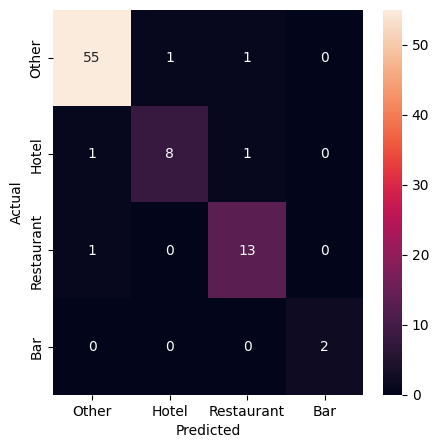

In [267]:
conf_mat = confusion_matrix(test_output, llm_df.category, labels=llm_df.category.unique())
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(
    conf_mat,
    annot=True,
    fmt='d',
    xticklabels=llm_df.category.unique(),
    yticklabels=llm_df.category.unique()
)
plt.ylabel('Actual')
plt.xlabel('Predicted')

We compare those results against a pre-written old school sklearn version that is trained on our sample...

In [294]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [291]:
vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    min_df=5,
    norm='l2',
    encoding='latin-1',
    ngram_range=(1, 3),
)

In [292]:
preprocessor = ColumnTransformer(
    transformers=[
        ('payee', vectorizer, 'payee')
    ],
    sparse_threshold=0,
    remainder='drop'
)

In [329]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LinearSVC(dual="auto"))
])

In [325]:
model = pipeline.fit(training_input, training_output)

In [326]:
predictions = model.predict(test_input)

In [327]:
print(classification_report(
    test_output,
    predictions,
    zero_division=False,
))

precision    recall  f1-score   support

         Bar       0.03      1.00      0.06         2
       Hotel       1.00      0.30      0.46        10
       Other       1.00      0.21      0.35        57
  Restaurant       0.67      0.29      0.40        14

    accuracy                           0.25        83
   macro avg       0.67      0.45      0.32        83
weighted avg       0.92      0.25      0.36        83

Text(0.5, 25.722222222222214, 'Predicted')

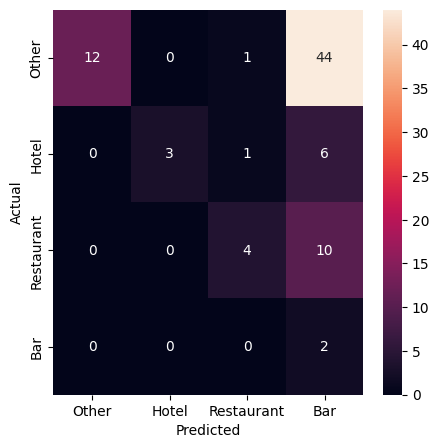

In [328]:
conf_mat = confusion_matrix(test_output, predictions, labels=llm_df.category.unique())
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(
    conf_mat,
    annot=True,
    fmt='d',
    xticklabels=llm_df.category.unique(),
    yticklabels=llm_df.category.unique()
)
plt.ylabel('Actual')
plt.xlabel('Predicted')

## Improve

We feed the training set into few-shot pre-prompts and see if it improves the results...

In [ ]:
def get_fewshots(traning_input, training_ouput, batch_size=10):
    input_batches = get_batch_list(list(training_input.payee), n=batch_size)
    output_batches = get_batch_list(list(training_output), n=batch_size)
    fewshot_list = []
    for i, input_list in enumerate(input_batches):
        fewshot_list.extend([
            {
                "role": "user",
                "content": "\n".join(input_list),
            },
            {
                "role": "assistant",
                "content": json.dumps(output_batches[i])
            }
        ])
    return fewshot_list

In [422]:
fewshot_list = get_fewshots(input_batches, output_batches)

In [439]:
@retry(ValueError, tries=2, delay=2)
def classify_payees(name_list):
    prompt = """You are an AI model trained to categorize businesses based on their names.

You will be given a list of business names, each separated by a new line.

Your task is to analyze each name and classify it into one of the following categories: Restaurant, Bar, Hotel, or Other.

It is extremely critical that there is a corresponding category output for each business name provided as an input.

If a business does not clearly fall into Restaurant, Bar, or Hotel categories, you should classify it as "Other".

Even if the type of business is not immediately clear from the name, it is essential that you provide your best guess based on the information available to you. If you can't make a good guess, classify it as Other.

For example, if given the following input:

"Intercontinental Hotel\nPizza Hut\nCheers\nWelsh's Family Restaurant\nKTLA\nDirect Mailing"

Your output should be a JSON list in the following format:

["Hotel", "Restaurant", "Bar", "Restaurant", "Other", "Other"]

This means that you have classified "Intercontinental Hotel" as a Hotel, "Pizza Hut" as a Restaurant, "Cheers" as a Bar, "Welsh's Family Restaurant" as a Restaurant, and both "KTLA" and "Direct Mailing" as Other.

Ensure that the number of classifications in your output matches the number of business names in the input. It is very important that the length of JSON list you return is exactly the same as the number of business names your receive.
"""
    messages = [
        {
            "role": "system",
            "content": prompt,
        }
    ]
    messages += fewshot_list
    messages += [
        {
            "role": "user",
            "content": "\n".join(name_list),
        }
    ]
    response = client.chat.completions.create(
        messages=messages,
        model="llama-3.3-70b-versatile",
        temperature=0,
    )

    answer_str = response.choices[0].message.content
    answer_list = json.loads(answer_str)

    acceptable_answers = [
        "Restaurant",
        "Bar",
        "Hotel",
        "Other",
    ]
    for answer in answer_list:
        if answer not in acceptable_answers:
            raise ValueError(f"{answer} not in list of acceptable answers")

    try:
        assert len(name_list) == len(answer_list)
    except:
        raise ValueError(f"Number of outputs ({len(name_list)}) does not equal the number of inputs ({len(answer_list)})")
    
    return dict(zip(name_list, answer_list))

In [429]:
llm_output = classify_batches(list(test_input.payee), batch_size=10)

Working... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:22

In [430]:
llm_df = pd.DataFrame(llm_output.items(), columns=["payee", "category"])

Check the ones that are wrong. Tweak your prompt to match.

In [435]:
proof_df = llm_df.merge(
    sample_df,
    on="payee",
    how="inner",
    suffixes=["_llm", "_human"]
)

In [437]:
proof_df[proof_df.category_llm != proof_df.category_human]

,payee,category_llm,category_human
1,ALBERGO HILTON ROME AIRPO FIUMICINO,Hotel,Other
7,SHERIDON KEITH DESIGN & PHOTOGRAPHY,Other,Hotel
16,SOTTOVOCE MADERO,Restaurant,Other
27,ANGELE RESTAURANT & BAR,Bar,Restaurant
75,HILTON VELA RESTAURANT,Restaurant,Hotel
